#Assignment No. 2 - Probability distributions and their role in data analysis

*Khuzaima Yunus - 2021409*  
*Hassan Riaz - 2021223*

## Google Drive Connection, Libraries Import & DataFrame Creation

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

### Dataset Downloaded From Kaggle, click the hyperlink for details

<a href="https://www.kaggle.com/datasets/huzzefakhan/zameencom-property-data-pakistan">Zameen.com Property Data Pakistan</a>

In [8]:
# Khuzaima 'Path'
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/DS221/Property_with_Feature_Engineering.csv")


In [ ]:
# Hassan 'Path'
data = pd.read_csv("/content/gdrive/MyDrive/Datasets/Property_with_Feature_Engineering.csv")

In [16]:
data.head()


,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


In [ ]:
data.describe()

In [ ]:
data.head()

## 1. Poisson Distribution of Daily Property Count 

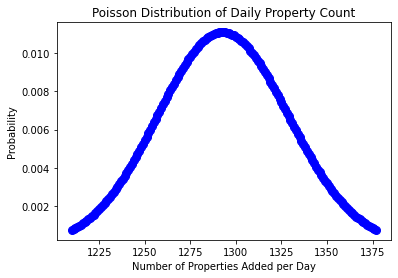

Mean: 16446553.542564252
Standard Deviation: 34164116.78823364


In [ ]:
daily_properties = data.groupby(['year', 'month', 'day']).size().reset_index(name='count')

# Calculate the mean and standard deviation of the daily property count
mu = daily_properties['count'].mean()
sigma = daily_properties['count'].std()

# Set the range of x values
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))

# Plot the Poisson distribution
plt.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='Poisson PMF')

# Add labels and title
plt.xlabel('Number of Properties Added per Day')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Daily Property Count')

# Show the plot
plt.show()


In [14]:
price_mean = data['price'].mean()
price_std = data['price'].std()
mean = int(round(price_mean,-6))
std = int(round(price_std,-6))
# Display the mean and standard deviation
print('Mean:', mean)
print('Standard Deviation:', std)

Mean: 16000000
Standard Deviation: 34000000


## 2. Expected Value Of Property Area In Islamabad

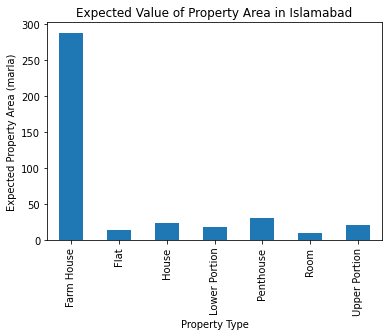

In [21]:
# Group the data by city and property type, and then calculate the mean area for each group
grouped_data = data.loc[data["city"] == "Islamabad"].groupby(["property_type"])["area_marla"].mean()

# Plot the data
grouped_data.plot(kind="bar")
plt.title("Expected Value of Property Area in Islamabad")
plt.xlabel("Property Type")
plt.ylabel("Expected Property Area (marla)")
plt.show()

## 3. Variance Of Property Area By Province

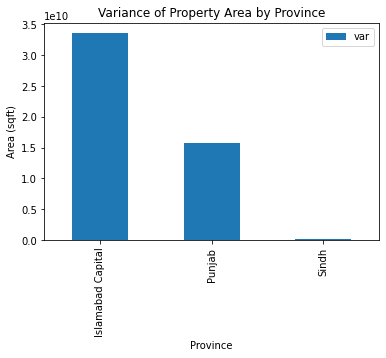

In [23]:
# Group the data by province, and then calculate the variance and standard deviation of the area_sqft column for each group
grouped_data = data.groupby("province_name")["area_sqft"].agg(["var"])

# Plot the data
grouped_data.plot(kind="bar", y=["var"])
plt.title("Variance of Property Area by Province")
plt.xlabel("Province")
plt.ylabel("Area (sqft)")
plt.show()

## 4. Price Distribution 

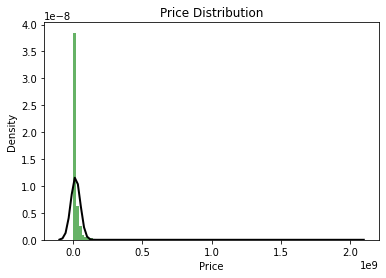

In [13]:
from scipy.stats import norm
# create histogram
plt.hist(data['price'], bins=100, density=True, alpha=0.6, color='g')

# create normal distribution curve
mu, std = norm.fit(data['price'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# add labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution')

plt.show()

## 5. Normal Distribution Of Price in 2018

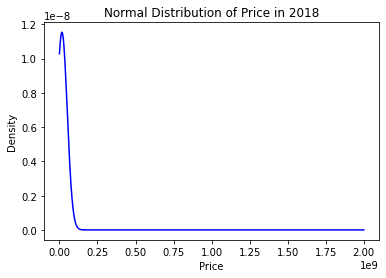

In [15]:
df = data
# Step 1: Subset the dataframe by 2018 date_added
df_2018 = df[df['date_added'].str.contains('2019')]

# Step 2: Extract the price column
price_2018 = df_2018['price']

# Step 3: Calculate the mean and standard deviation
mean = price_2018.mean()
std_dev = price_2018.std()

# Step 4: Create a normal distribution curve using mean and std_dev
x_axis = np.linspace(price_2018.min(), price_2018.max(), 1000)
y_axis = norm.pdf(x_axis, mean, std_dev)

# Step 5: Plot the normal distribution curve
plt.plot(x_axis, y_axis, color='blue')
plt.title('Normal Distribution of Price in 2018')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

## 6. Top 10 Property Types with Most Sales in Karachi

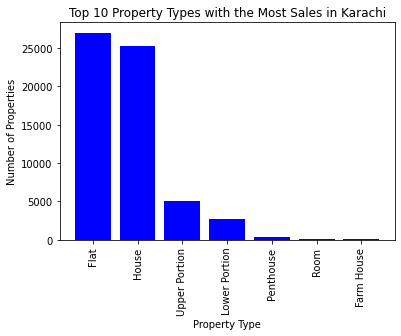

In [ ]:
df_karachi = df[df['city'] == 'Karachi']

# Step 2: Group the subset by property_type and count the number of properties in each group
grouped_df = df_karachi.groupby('property_type').size().reset_index(name='counts')

# Step 3: Sort the groups in descending order of property count
sorted_df = grouped_df.sort_values('counts', ascending=False)

# Step 4: Extract the top 10 groups based on property count
top_10 = sorted_df.head(10)

# Step 5: Plot the top 10 groups using a bar chart
plt.bar(top_10['property_type'], top_10['counts'], color='blue')
plt.title('Top 10 Property Types with the Most Sales in Karachi')
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.xticks(rotation=90)
plt.show()

## 7. Top 10 Property Types with Most Sales in Lahore

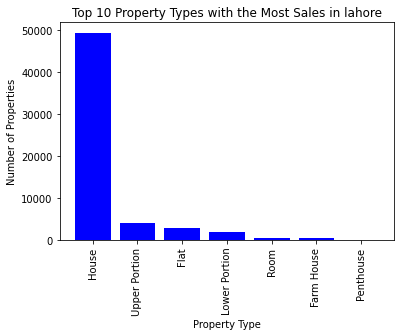

In [ ]:
df_karachi = df[df['city'] == 'Lahore']

# Step 2: Group the subset by property_type and count the number of properties in each group
grouped_df = df_karachi.groupby('property_type').size().reset_index(name='counts')

# Step 3: Sort the groups in descending order of property count
sorted_df = grouped_df.sort_values('counts', ascending=False)

# Step 4: Extract the top 10 groups based on property count
top_10 = sorted_df.head(10)

# Step 5: Plot the top 10 groups using a bar chart
plt.bar(top_10['property_type'], top_10['counts'], color='blue')
plt.title('Top 10 Property Types with the Most Sales in lahore')
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.xticks(rotation=90)
plt.show()